# Anopheles genomes phylogenetic scaffolding notebook

1. Yoann Aselmetti
2. Severine Berard
3. Eric Tannier
4. Cedric Chauve, Department of Mathematics, Simon Fraser University, cedric.chauve@sfu.ca

## Introduction

This notebook describes an improvement of the assembly of several mosquito genomes of the genus *Anopheles* using the newly developed phylogenetic scaffolding methods DeClone and ADseq.

## Material and methods

**To do: ProfileNJ, ADseq and DeClone, sequencing data, species tree**

## Results

We now describe the results of our analysis, both in terms of scaffolding of extant *Anopheles* genomes, with a special focus on the genome *Anopheles funestus*, and of the ancestral genome maps we obtain, and what we can learn from them in terms of the evolution of the *Anopheles* genus.

In [1]:
import sys, math, numpy as np
%matplotlib inline  
import matplotlib, matplotlib.pyplot as plt

### Gene trees

**To do: describe the improvement of the new gene trees, gene content, duplications, ...**

In [4]:
sys.path.insert(0, './scripts')
from declone_aux import *
from plotting import *

# Reading the genes file
GENES_import(read_tab_file("./data/anopheles_genes_filtered"))
OG_import(read_tab_file("./data/anopheles_genes_filtered"))
GENOMES_import(read_tab_file("./data/anopheles_genes_filtered"))
SPECIES=GENOMES_list() # List of all species
# Reading the BESST file
BESST_import(read_tab_file("./data/anopheles_besst"))
# Reading the DeClone results file
DECLONE_import(read_tab_file("./results/anopheles_results_01_all"))
ADJACENCIES=DECLONE_adjacencies_list() # List of all adjacencies

### Scaffolding extant genomes: overview

In this section, we present a general overview of the scaffolding adjacencies inferred by the methods ADseq+DeClone.

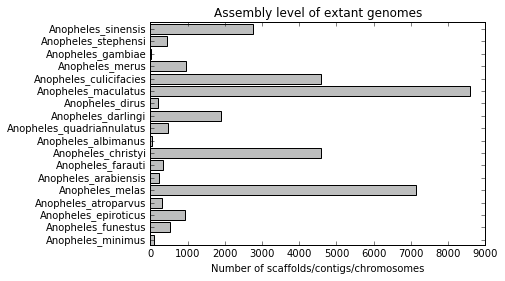

In [6]:
# Plotting the fragmentation of each genome
GENOMES_FRAGMENTATION={sp: {0: GENOMES_nbscf(sp)} for sp in SPECIES}
xlabel = "Number of scaffolds/contigs/chromosomes"
title  = "Assembly level of extant genomes"
plot_scores_distribution_per_species(GENOMES_FRAGMENTATION, 1, 0.5, xlabel, title)

species name	<0.1	<0.2	<0.3	<0.4	<0.5	<0.6	<0.7	<0.8	<0.9	<1.0
Anopheles_minim	57	0	0	3	3	6	0	0	6	72
Anopheles_funes	243	0	33	36	18	30	6	30	63	999
Anopheles_epiro	693	42	15	24	51	93	39	90	78	1803
Anopheles_atrop	363	72	24	12	3	12	3	3	6	123
Anopheles_melas	8619	228	1617	1848	3906	2610	273	1182	366	11583
Anopheles_arabi	462	105	81	57	33	18	30	24	30	183
Anopheles_farau	63	0	3	3	12	9	6	33	12	543
Anopheles_chris	2706	6	84	159	468	255	369	225	231	9357
Anopheles_albim	6	0	0	0	0	0	0	0	0	0
Anopheles_quadr	345	12	42	33	24	45	36	30	24	720
Anopheles_darli	138	0	9	21	18	48	21	12	138	2118
Anopheles_dirus	69	0	9	0	9	3	3	15	9	198
Anopheles_macul	5385	144	492	1029	4764	975	165	558	207	16914
Anopheles_culic	3372	36	75	396	867	873	447	207	198	10881
Anopheles_merus	648	12	3	15	45	51	72	60	111	1749
Anopheles_gambi	0	0	0	0	0	0	0	0	0	0
Anopheles_steph	177	6	0	12	30	72	12	33	15	765
Anopheles_sinen	990	63	198	360	489	603	246	132	204	4656


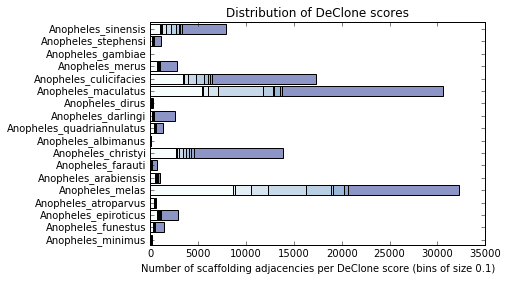

In [17]:
# Computing
# - ADJ_DISTRIB: the distribution of DeClone scores for scaffolding adjacencies in nb_bins bins
# - ADJ_NB:      the number of scaffolding adjacencies per species
nb_bins=10 # Binning the adjacencies by bins of size 0.1
ivalues=range(0,nb_bins)
ADJ_NB = {sp: len([adj for adj in ADJACENCIES if DECLONE_adj_species_name(adj)==sp and DECLONE_adj_score(adj)<1.0]) for sp in SPECIES} 
ADJ_DISTRIB = {sp: {t : 0 for t in ivalues} for sp in SPECIES}
for adjacency in ADJACENCIES: 
    (score,species) = (DECLONE_adj_score(adjacency), DECLONE_adj_species_name(adjacency))
    if score<1.0 and species!="ANCESTRAL": # Scaffolding adjacency
        ADJ_DISTRIB[species][math.floor(score*nb_bins)]+=1
        
# CC: I do not know how to generate a nice table: this is a pis-aller
print("species name\t"+"\t".join(["<"+str(((t+1)/nb_bins)) for t in ivalues2]))
print("\n".join(sp[0:15]+"\t"+"\t".join(str(ADJ_DISTRIB[sp][t]) for t in ivalues) for sp in ADJ_DISTRIB.keys()))
# Figure
xlabel= "Number of scaffolding adjacencies per DeClone score (bins of size "+str(1.0/nb_bins)+")"
title = "Distribution of DeClone scores"
plot_scores_distribution_per_species(ADJ_DISTRIB, nb_bins, 1.0, xlabel, title)

We can observe on the table and figure above that many adjacencies seem to have a high DeClone score, aLthough for highly fragmented genomes, we can observe a large number of poorly supported adjacencies. To visualize better, we can observe the ratio of adjacencies per score.

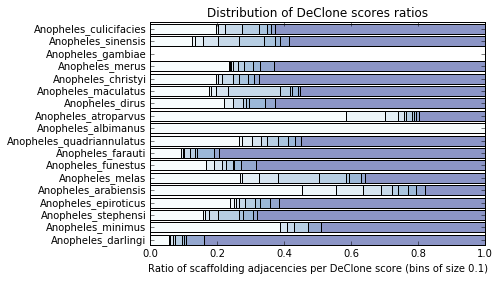

In [19]:
# Ratio of the number of adjacencies in a score bin versus the total number of adjacencies
ADJ_DISTRIB_R={sp : {t: ADJ_DISTRIB[sp][t]/max(0.1,ADJ_NB[sp]) for t in ADJ_DISTRIB[sp].keys()} for sp in ADJ_DISTRIB.keys()} 
xlabel = "Ratio of scaffolding adjacencies per DeClone score (bins of size "+str(1.0/nb_bins)+")"
title  = "Distribution of DeClone scores ratios"
plot_scores_distribution_per_species(ADJ_DISTRIB_R, nb_bins, 1.0, xlabel, title)

### *Anopheles funestus* scaffolding

### Ancestral genomes and evolution

## Discussion

## References